<center>
  <h1><font color='#2823bc', size='30px'>Machine Learning:</font>
  <font size='30px'>De la teoría a la práctica</font>
  </h1>
  <hr>
</center>

#Set up

In [1]:
!ls

drive  sample_data


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
!ls

 Classroom			    Machine-Learning
 Codelab_Google_Colab		   'ML: De la teoría  a la práctica.ipynb'
'Colab Notebooks'		    Otros
 Cursos				    Proyectos
'Data Science & Machine Learning'  'Reinforcement Learning'
 DSC-UNI			    Webinar


In [ ]:
!git clone https://github.com/GDSC-UNI/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [4]:
%cd  Machine-Learning/

/content/drive/MyDrive/Machine-Learning


In [5]:
%%bash

head dataset/PD.csv

name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.4,148.65,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.0105,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.0359,0.0827,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.3

# Data Staging

In [6]:
import os
import numpy as np
import pandas as pd

In [7]:
DATA_DIR = os.path.join('dataset/PD.csv')

In [8]:
df = pd.read_csv(DATA_DIR, encoding='utf-8') 

In [9]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
df.sample(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
96,phon_R01_S22_6,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,0.307,0.01806,0.02024,0.02809,0.05417,0.00852,22.663,1,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
175,phon_R01_S43_5,115.380,123.109,108.634,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,0.137,0.00812,0.00933,0.01133,0.02436,0.00401,26.005,0,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
28,phon_R01_S06_5,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,0.161,0.00769,0.01012,0.01661,0.02307,0.00677,25.970,1,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
59,phon_R01_S16_6,114.847,271.314,104.680,0.00867,0.00008,0.00373,0.00520,0.01120,0.03225,0.350,0.01805,0.01974,0.02519,0.05414,0.01143,21.660,1,0.547975,0.817396,-4.609161,0.221711,1.831691,0.316395
118,phon_R01_S27_4,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,0.129,0.00617,0.00744,0.01151,0.01851,0.00856,25.020,1,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,0.05551,0.05005,0.06023,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
172,phon_R01_S43_2,110.739,113.597,100.139,0.00356,0.00003,0.00170,0.00200,0.00510,0.01484,0.133,0.00754,0.00950,0.01285,0.02261,0.00430,26.550,0,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
93,phon_R01_S22_3,152.125,161.469,76.596,0.00382,0.00003,0.00191,0.00226,0.00574,0.05925,0.637,0.03341,0.03794,0.04398,0.10024,0.01211,20.969,1,0.447456,0.697790,-6.152551,0.173520,2.080121,0.160809
143,phon_R01_S34_4,202.805,231.508,86.232,0.00370,0.00002,0.00189,0.00211,0.00568,0.01997,0.180,0.01117,0.01177,0.01506,0.03350,0.02010,18.687,1,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032


In [11]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
df[df.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [13]:
df = df.drop(["name"],axis=1)

In [14]:
df.sample(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
110,200.714,223.982,89.686,0.00621,0.000030,0.00371,0.00337,0.01112,0.02286,0.207,0.01192,0.01439,0.01852,0.03576,0.00704,23.239,1,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
172,110.739,113.597,100.139,0.00356,0.000030,0.00170,0.00200,0.00510,0.01484,0.133,0.00754,0.00950,0.01285,0.02261,0.00430,26.550,0,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
127,166.888,198.966,79.512,0.00638,0.000040,0.00368,0.00351,0.01104,0.02857,0.257,0.01547,0.01859,0.02301,0.04641,0.01796,18.330,1,0.585169,0.736964,-5.825257,0.115697,1.996146,0.196535
64,229.401,252.221,221.156,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,0.00769,0.00957,0.01016,0.02308,0.00300,26.415,0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
54,108.807,134.656,102.874,0.00761,0.000070,0.00349,0.00486,0.01046,0.02719,0.255,0.01483,0.01609,0.02067,0.04450,0.01036,21.028,1,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
130,120.289,128.143,100.209,0.00492,0.000040,0.00269,0.00238,0.00808,0.01412,0.125,0.00703,0.00820,0.01194,0.02110,0.01610,23.949,1,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923
63,228.832,234.619,223.634,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,0.145,0.00882,0.01075,0.01179,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
35,201.464,210.565,195.708,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,0.107,0.00586,0.00760,0.00957,0.01758,0.00135,31.732,0,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
190,174.188,230.978,94.261,0.00459,0.000030,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
87,176.281,227.381,125.610,0.00520,0.000030,0.00287,0.00312,0.00862,0.06511,0.580,0.03671,0.04159,0.04683,0.11012,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968


In [15]:
df.shape

(195, 23)

In [16]:
df["status"].unique()

array([1, 0])

In [17]:
X = df.drop(["status"], axis=1).copy(deep=True)
y = df["status"].copy(deep=True)

# Feature Engineering

# Preprocesamiento 

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X.values

array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

In [20]:
X.values.reshape(-1,1).shape

(4290, 1)

In [21]:
for i in X.columns:
  scaler = StandardScaler().fit(X[i].values.reshape(-1,1))
  X[i] = scaler.transform(X[i].values.reshape(-1,1))

In [22]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


# Visualización de datos

In [23]:
X.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

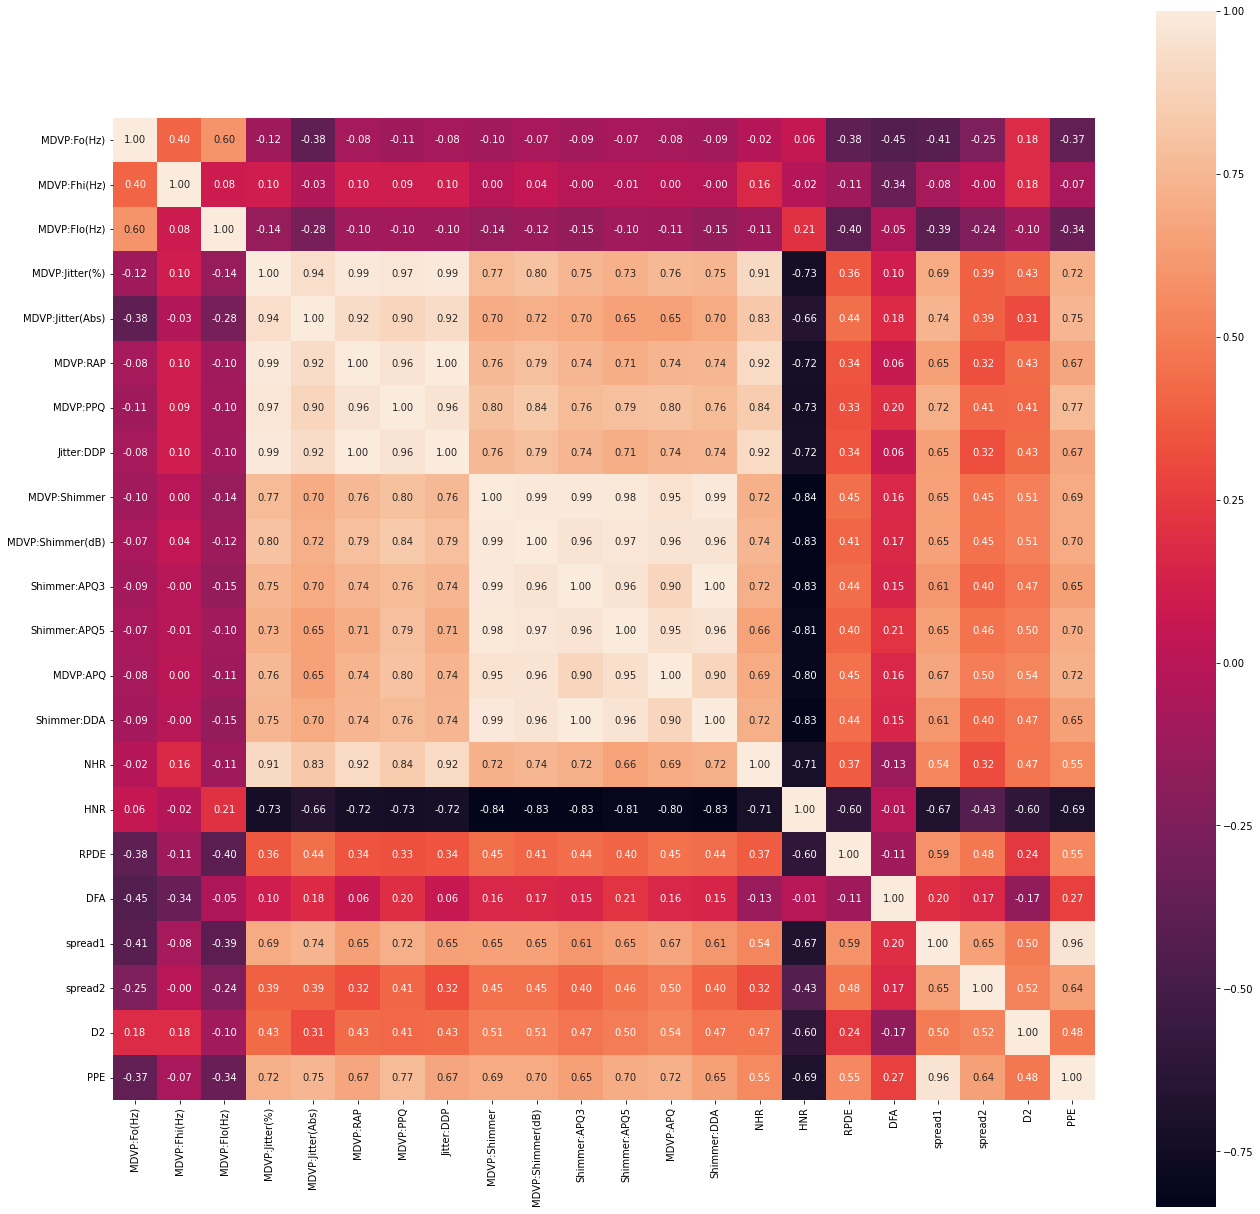

In [25]:
plt.figure(figsize=(22,22))
sns.heatmap(X.corr(), cbar=True, square=True, fmt='.2f', annot=True);
plt.show()

# Modelamiento

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1]


In [31]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [34]:
class_name = [0, 1]

In [35]:
def ConfusionMatriz(class_names, cnf_matrix):
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
  ax.xaxis.set_label_position('top')
  plt.tight_layout()
  plt.title('Matriz de confusion', y = 1.1)
  plt.ylabel('Etiqueta actual')
  plt.xlabel('Etiqueta de predicción')


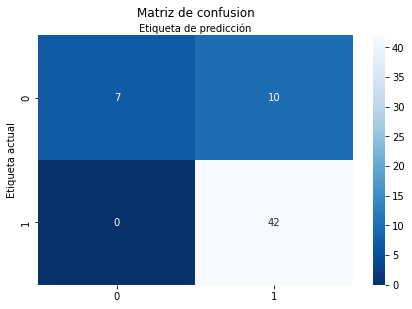

In [36]:
ConfusionMatriz(class_name, cnf_matrix)

In [37]:
print("Accurancy: ", metrics.balanced_accuracy_score(y_test, y_pred))

Accurancy:  0.7058823529411764


## Escribiendo Código de python

In [ ]:
!ls

dataset  img  README.md


In [ ]:
%%writefile hola.py

print("Hola mundo")

Writing hola.py


In [ ]:
!python hola.py

Hola mundo


# Plus

## Analisís de mis features

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [39]:
selector = SelectKBest(mutual_info_classif)
selector.fit(X_train, y_train)

scores = selector.scores_
scores

array([0.18467865, 0.2007074 , 0.17608185, 0.11175904, 0.16376881,
       0.08017973, 0.05789513, 0.08276493, 0.11067661, 0.05887036,
       0.11951414, 0.0788561 , 0.15376304, 0.12196512, 0.17586324,
       0.07615416, 0.08690554, 0.10680761, 0.2699287 , 0.17145335,
       0.01556963, 0.31844923])

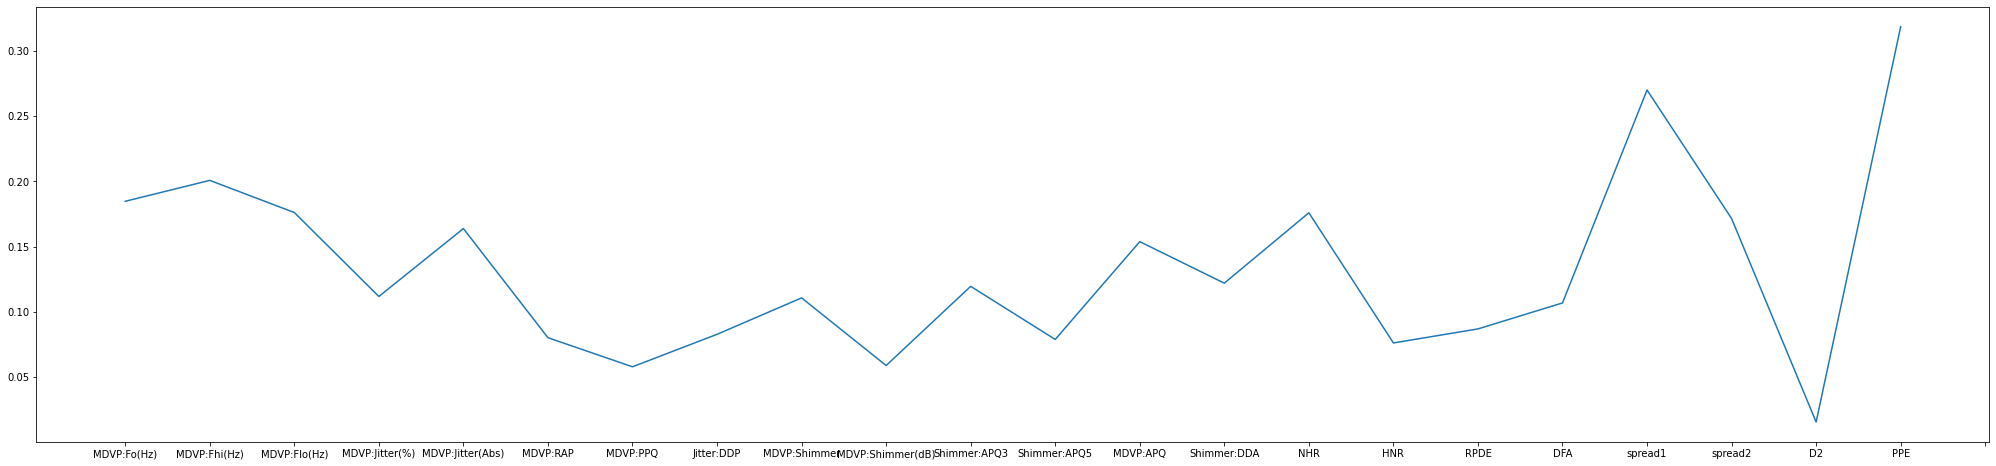

In [40]:
plt.rcParams["figure.figsize"] = [35,8]
plt.plot(scores)
plt.xticks(np.arange(len(X.columns)+1), list(X.columns));

In [42]:
selector.get_feature_names_out()

array(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'spread1', 'spread2', 'PPE'],
      dtype=object)

In [43]:
X2 = X[selector.get_feature_names_out()]
X2.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:APQ,Shimmer:DDA,NHR,spread1,spread2,PPE
0,-0.829300,-0.436165,-0.952037,0.749759,0.332985,0.607532,-0.067893,0.801323,0.480477,0.868886
1,-0.770972,-0.530974,-0.057721,1.037674,1.159454,1.548254,-0.137843,1.479853,1.311185,1.803605
2,-0.909476,-0.723168,-0.109875,1.325589,0.699187,1.175323,-0.291633,1.141445,1.017682,1.402661
3,-0.909622,-0.649092,-0.114229,1.325589,0.806859,1.340229,-0.280719,1.440945,1.293840,1.806954
4,-0.925657,-0.606245,-0.130608,1.901418,1.216839,1.899461,-0.178026,1.780940,0.096195,2.267082


Volvemos a entrenar mi modelo con las features seleccionadas

In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=2)

In [48]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression()

In [49]:
y_pred2 = model2.predict(X_test2)
print("Accurancy: ", metrics.balanced_accuracy_score(y_test2, y_pred2))

Accurancy:  0.6445035460992908


Disminuimos la eficiencia, en este caso, la selección de estas features no me convienen

## PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

In [54]:
model3 = LogisticRegression()

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)

In [55]:
model3.fit(dt_train, y_train)

LogisticRegression()

In [57]:
print("Score PCA: ", model3.score(dt_test, y_test))

Score PCA:  0.8305084745762712


Incrementamos la eficiencia



##Guardar modelos

In [64]:
!ls

dataset  hola.py  img  models  README.md


In [66]:
import joblib

joblib.dump(model, './models/modelo_eficiencia_70.pkl')
joblib.dump(model2, './models/modelo_eficiencia_69.pkl')
joblib.dump(model3, './models/modelo_eficiencia_83.pkl')

['./models/modelo_eficiencia_83.pkl']